# Cloud Analysis of Isolated cells




### Dec 2020, JAH

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

to_df = pd.DataFrame.from_records

from invisible_cities.reco import corrections as cof

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.hfit         as hfit

import bes.bes           as bes
import bes.pltbes        as pltbes

import bes.chits         as chits
import bes.display       as nplay

import clouds        as clouds
import pltclouds     as pltclouds

import bes.cloudsdia as cloudsdia

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed Dec 16 16:43:41 2020


### Event

In [5]:
#runs      = [8182,]
#sample    = 'ds'
#dfhits, dfhitHTs, dmaps = cloudsdia.load_data(runs, sample)
#dfhits   = dfhits[0]
#dfhitHTs = dfhitHTs[0]
#dmaps    = dmaps[0]
#corrfac  = cloudsdia.get_corrfac(dmaps)

In [6]:
#events  = np.unique(dfhits.event.values)
#ievent   = np.random.choice(events, 1)[0]
#print('event number ', ievent)
#evt    = dfhits.groupby('event').get_group(ievent)
#print('total energy {:6.3f}'.format(np.sum(evt.Ec)), 'MeV')
#dz     = np.max(evt.Z) - np.min(evt.Z)
#print('z-width {:6.3f}'.format(dz), 'mm')

## Run

In [7]:
#run     = True
#ntotal  = 10000
#runs    = [8182, 8183, 8184]
#runs    = [8182,]
#range_e = (1.55, 1.75)
#if (run):
#    ok  = input('Do you want to run (y) ? ')
#    if (ok == 'y'): 
#        df, dfiso  = cloudsdia.cloudsdia(runs, ntotal = ntotal)
#        sel     = ut.in_range(df.evt_ecells, range_e)
#        df      = df[sel]
#        print('size ', len(df))
        #df   .to_hdf('clouds_summary_ds_141220.h5'    , key='df', mode='w')
        #dfiso.to_hdf('clouds_summary_ds_iso_141220.h5', key='df', mode='w')

## Load Data

In [11]:
df      = pd.read_hdf('./clouds_summary_ds_161220.h5'      , key = 'df')
dfiso   = pd.read_hdf('./clouds_summary_ds_iso_161220.h5'  , key = 'df')
dfslice = pd.read_hdf('./clouds_summary_ds_slice_161220.h5', key = 'df')

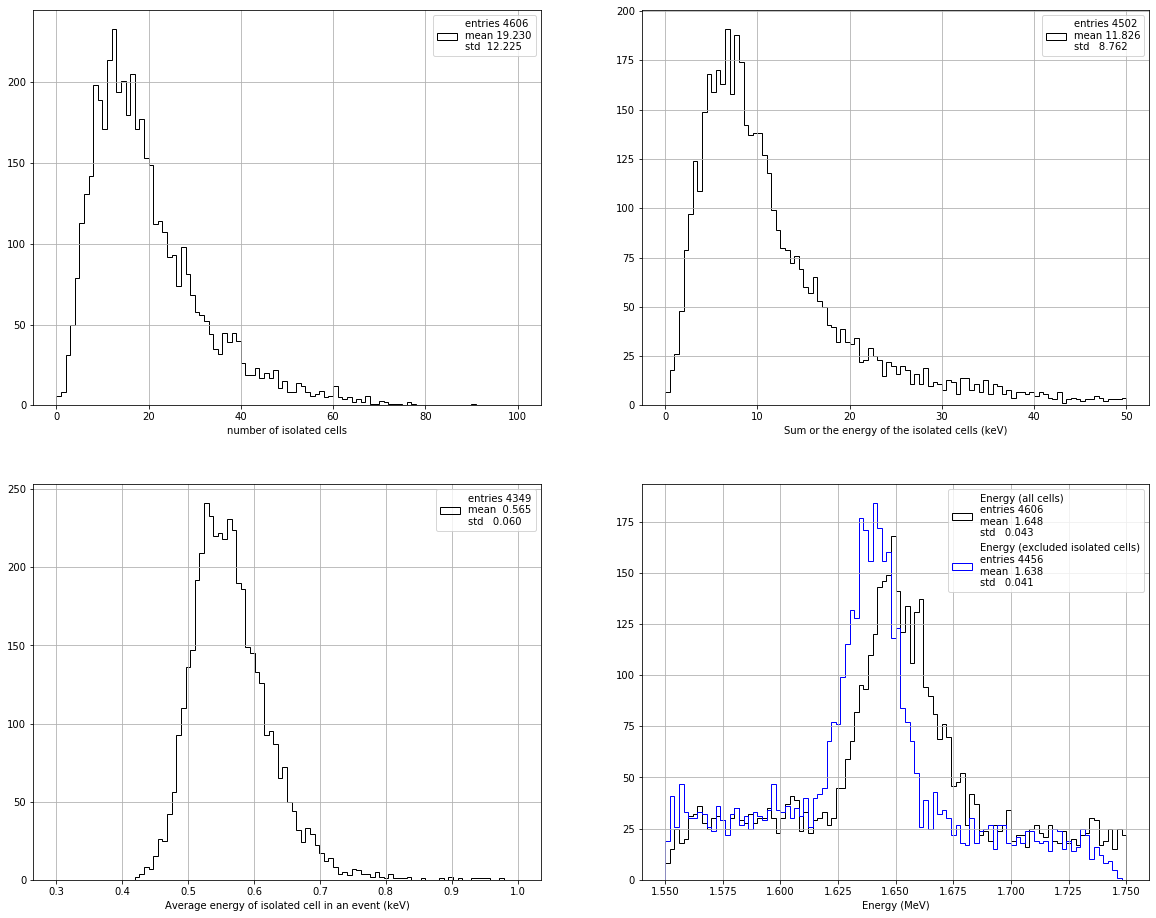

In [196]:
subplot = pltext.canvas(4, 2, 8, 10)

sel     = (df.evt_dz < 120) & (df.evt_ecells > 1.55) & (df.evt_ecells < 1.75) & (df.evt_outcells == 0)

subplot(1)
pltext.hist(df.evt_nisos[sel], 100, range = (0., 100));
plt.xlabel('number of isolated cells')

subplot(2)
pltext.hist(1000. * df.evt_eisos[sel], 100, range = (0., 50.));
plt.xlabel('Sum or the energy of the isolated cells (keV)')

subplot(3)
pltext.hist(1000. * df.evt_eisos[sel]/ df.evt_nisos[sel], 100, range = (0.3, 1.));
plt.xlabel('Average energy of isolated cell in an event (keV)')


subplot(4)
pltext.hist(df.evt_ecells[sel], 100, range = (1.55, 1.75), label = 'Energy (all cells)');
pltext.hist(df.evt_ecells[sel] - df.evt_eisos[sel], 100, range = (1.55, 1.75), label = 'Energy (excluded isolated cells)');
plt.xlabel('Energy (MeV)')
plt.legend();


## Relation between the number of isolated cells and the energy

(0.0, 50.0)

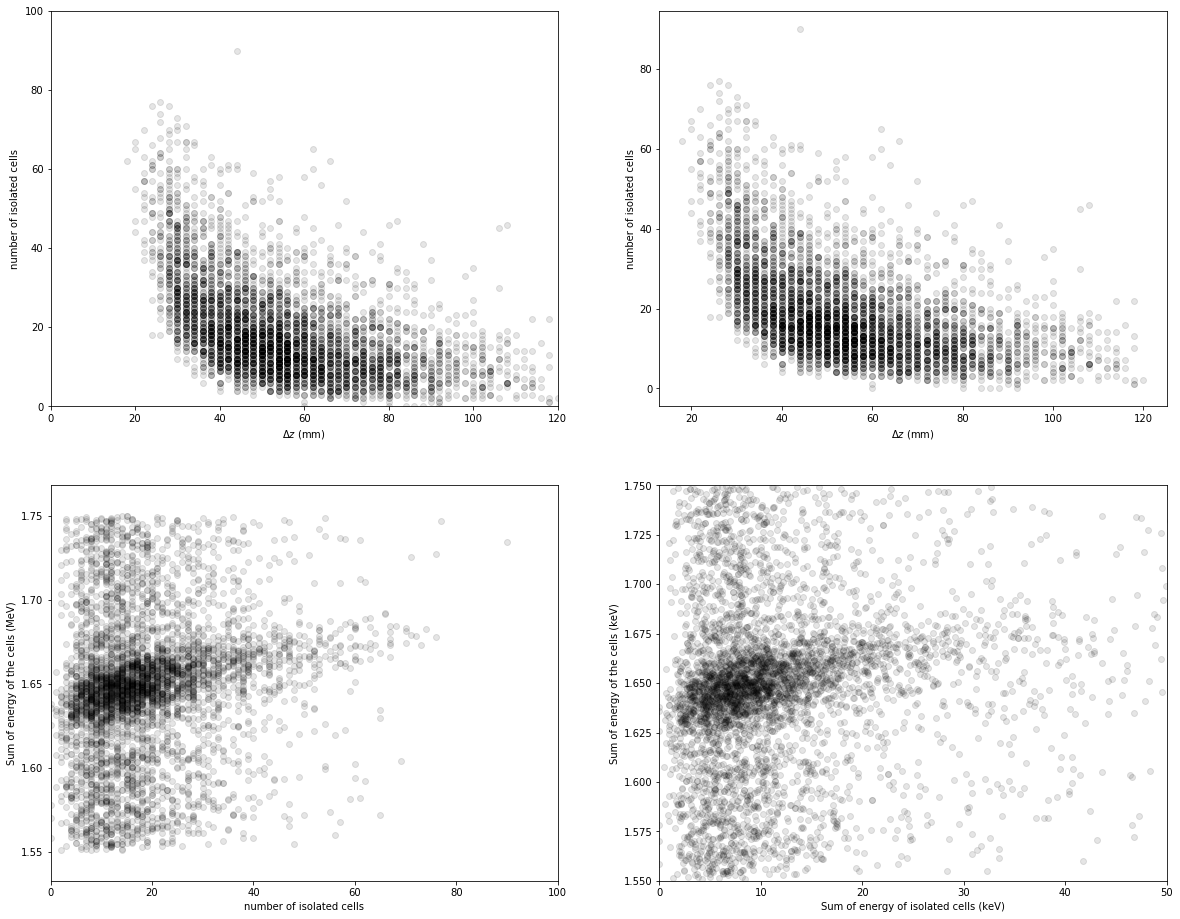

In [179]:
sel     = (df.evt_dz < 120) & (df.evt_ecells > 1.55) & (df.evt_ecells < 1.75) & (df.evt_outcells == 0)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
plt.scatter(df.evt_dz[sel], df.evt_nisos[sel], alpha = 0.1);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('number of isolated cells');
plt.xlim((0., 120.)); plt.ylim((0., 100.));

subplot(2)
plt.scatter(df.evt_dz[sel], df.evt_nisos[sel], alpha = 0.1);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('number of isolated cells');

subplot(3)
plt.scatter(df.evt_nisos[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylabel('Sum of energy of the cells (MeV)'); plt.xlabel('number of isolated cells');
plt.xlim((1.55, 1.75)); plt.xlim((0., 100.));

subplot(4)
plt.scatter(1000. * df.evt_eisos[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylabel('Sum of energy of the cells (keV)'); plt.xlabel('Sum of energy of isolated cells (keV)');
plt.ylim((1.55, 1.75)); plt.xlim((0., 50.))

### Inspect data

In [166]:
#pltext.df_inspect(dfiso, ncolumns = 3)

In [167]:
#pltext.df_inspect(dfslice, ncolumns = 3)

## Relation of number of isolated cells with Energy per slice

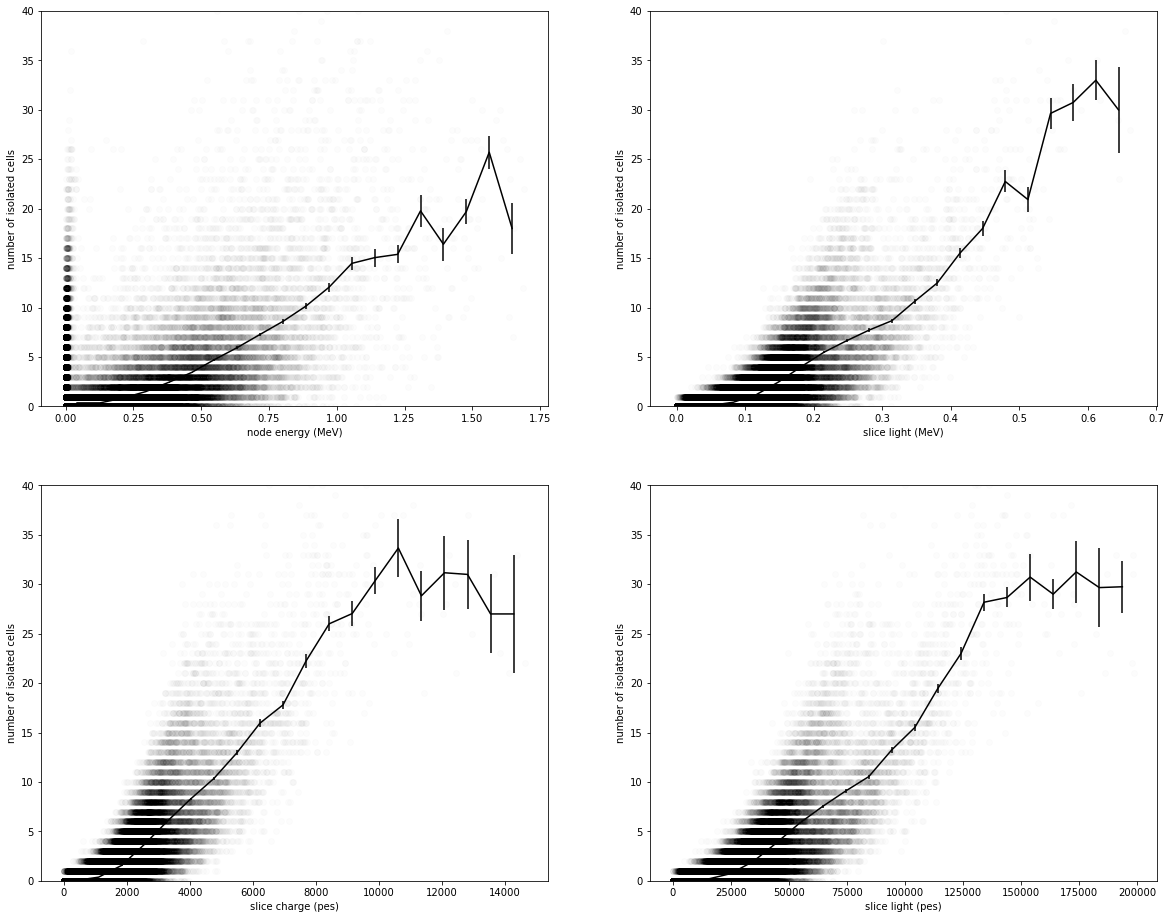

In [35]:
subplot = pltext.canvas(4, 2, 8, 10)

sel = dfslice.enodes >= 0.0

subplot(1)
pltext.hprofile_scatter(dfslice.enodes[sel], dfslice.nisos[sel], nbins = 20, alpha = 0.01);
plt.ylim((0., 40))
plt.xlabel('node energy (MeV)'); plt.ylabel('number of isolated cells')

subplot(2)
sel = dfslice.erec > 0.
pltext.hprofile_scatter(dfslice.erec[sel], dfslice.nisos[sel], nbins = 20, alpha = 0.01);
plt.ylim((0., 40))
plt.xlabel('slice light (MeV)'); plt.ylabel('number of isolated cells')

subplot(3)
sel = dfslice.q > 0.
pltext.hprofile_scatter(dfslice.q[sel], dfslice.nisos[sel], nbins = 20, alpha = 0.01);
plt.ylim((0., 40))
plt.xlabel('slice charge (pes)'); plt.ylabel('number of isolated cells')


subplot(4)
sel = dfslice.eraw > 0.
pltext.hprofile_scatter(dfslice.eraw[sel], dfslice.nisos[sel], nbins = 20, alpha = 0.01);
plt.ylim((0., 40))
plt.xlabel('slice light (pes)'); plt.ylabel('number of isolated cells');

**Conclusions:**
    
   * The number of isolated cells is correlated with the energy of the nodes, the slices charge and light
   
   
   * Sometimes there is no node energy (top-left plot) but there are nodes. I debug some events and sometimes there are isolated cells just before or just after the slice where the node is.
   
   
   * There is an structure of two groups with large number of isolated cells, are these consecutive slices? or this is due to the two-blob structure?
   
   

### Relation of the energy of the node/slice with largest energy in the event with respect the $\Delta z$

In [61]:
dfmax = dfslice.groupby('event').max()
dfmin = dfslice.groupby('event').min()
dfsum = dfslice.groupby('event').sum()

dz    = dfmax.z - dfmin.z
e0    = dfmax.eraw
q0    = dfmax.q
er    = dfmax.erec
enode = dfmax.enodes
nisos       = dfsum.nisos
esum        = dfsum.erec
esum_nodes  = dfsum.enodes

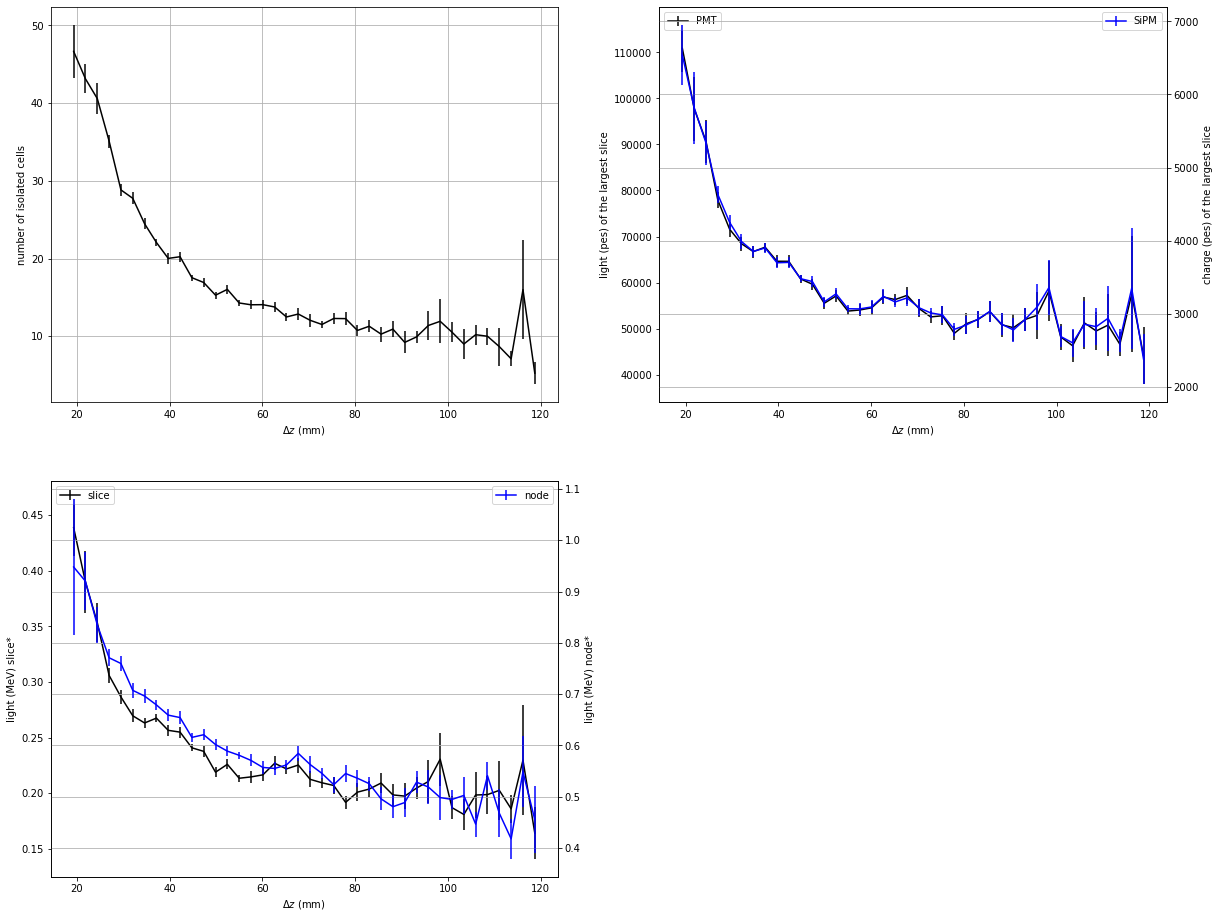

In [139]:
nbins = 40
sel   = (dz < 120.) & (esum >= 1.55) & (esum < 1.75)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
#pltext.hist(dz[sel], 100);
pltext.hprofile(dz[sel], nisos[sel], nbins);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('number of isolated cells'); plt.grid();

subplot(2)
#pltext.hist(dz[sel], 100);
pltext.hprofile(dz[sel], e0[sel], nbins, label = 'PMT');
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('light (pes) of the largest slice'); plt.legend(loc = 2);
plt.gca().twinx()
pltext.hprofile(dz[sel], q0[sel], nbins, c = 'blue', label = 'SiPM');
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('charge (pes) of the largest slice'); 
plt.grid(); plt.legend();


subplot(3)
#pltext.hist(dz[sel], 100);
pltext.hprofile(dz[sel], er[sel], nbins, label = r'slice');
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('light (MeV) slice*'); plt.legend(loc = 2)
plt.gca().twinx()
pltext.hprofile(dz[sel], enode[sel], nbins, label = 'node', c = 'blue');
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('light (MeV) node*');
plt.grid(); plt.legend();

#subplot(4)
#pltext.hist(dz[sel], 100);
#pltext.hprofile(dz[sel], esum[sel]      , nbins, label = 'sum energy cells', alpha = 0.05);
#pltext.hprofile(dz[sel], esum_nodes[sel], nbins, label = 'sum energy nodes', c = 'blue', alpha = 0.05);
#plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('light (MeV)'); plt.legend();



**Conclusions:**

  * The number of isolated cells is related clearly with the $\Delta z$ of the event, if the track is short, the number of isolated cells is large.
  
  
  * The light/charge of the slice with the largest light/charge of the event is crearly correlated with $\Delta z$. Shorter tracks produce events where the slice with the largest energy have a large energy compared with extended tracks along z.
  
  
  * Top-rigth plot, it is remarcable the agreement between light/charge (black/blue) lines, notice that the axis are on both sides of the plot!
  
  
  * There is again a correlation between lifht of the slice or node with the largest light and $\Delta z$

### $\Delta z$ effect for cells and nodes

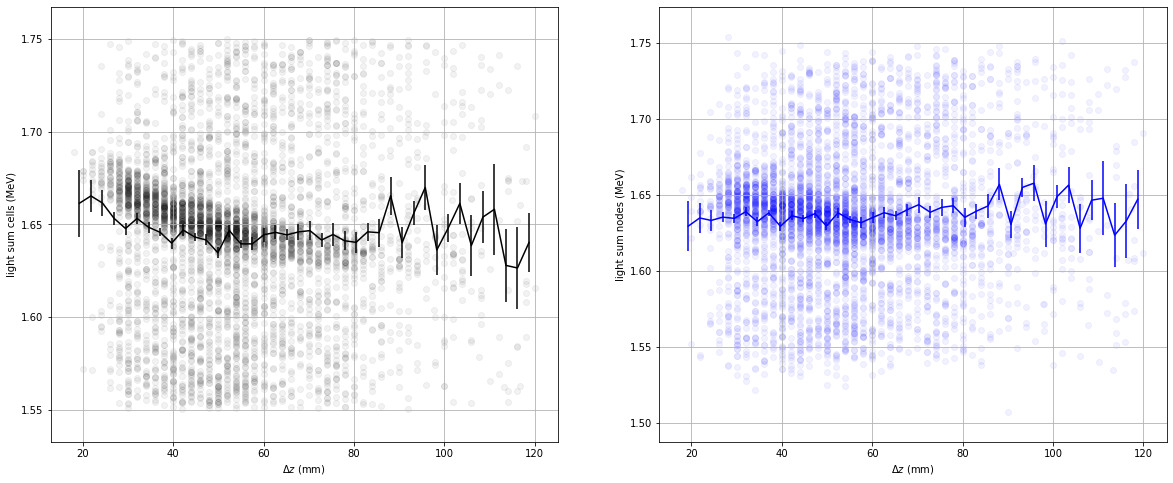

In [126]:
subplot = pltext.canvas(2, 2, 8, 10)

subplot(1)
pltext.hprofile_scatter(dz[sel], esum[sel]      , nbins, alpha = 0.05);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('light sum cells (MeV)'); plt.grid();

subplot(2)
pltext.hprofile_scatter(dz[sel], esum_nodes[sel], nbins, c = 'blue', alpha = 0.05);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('light sum nodes (MeV)'); plt.grid();

**Conclusions:**
    
   * The $\Delta z$ effect is mitigated using the energy of the nodes

### Relation of the number of isolated cells and the energy of the slice with the largest energy

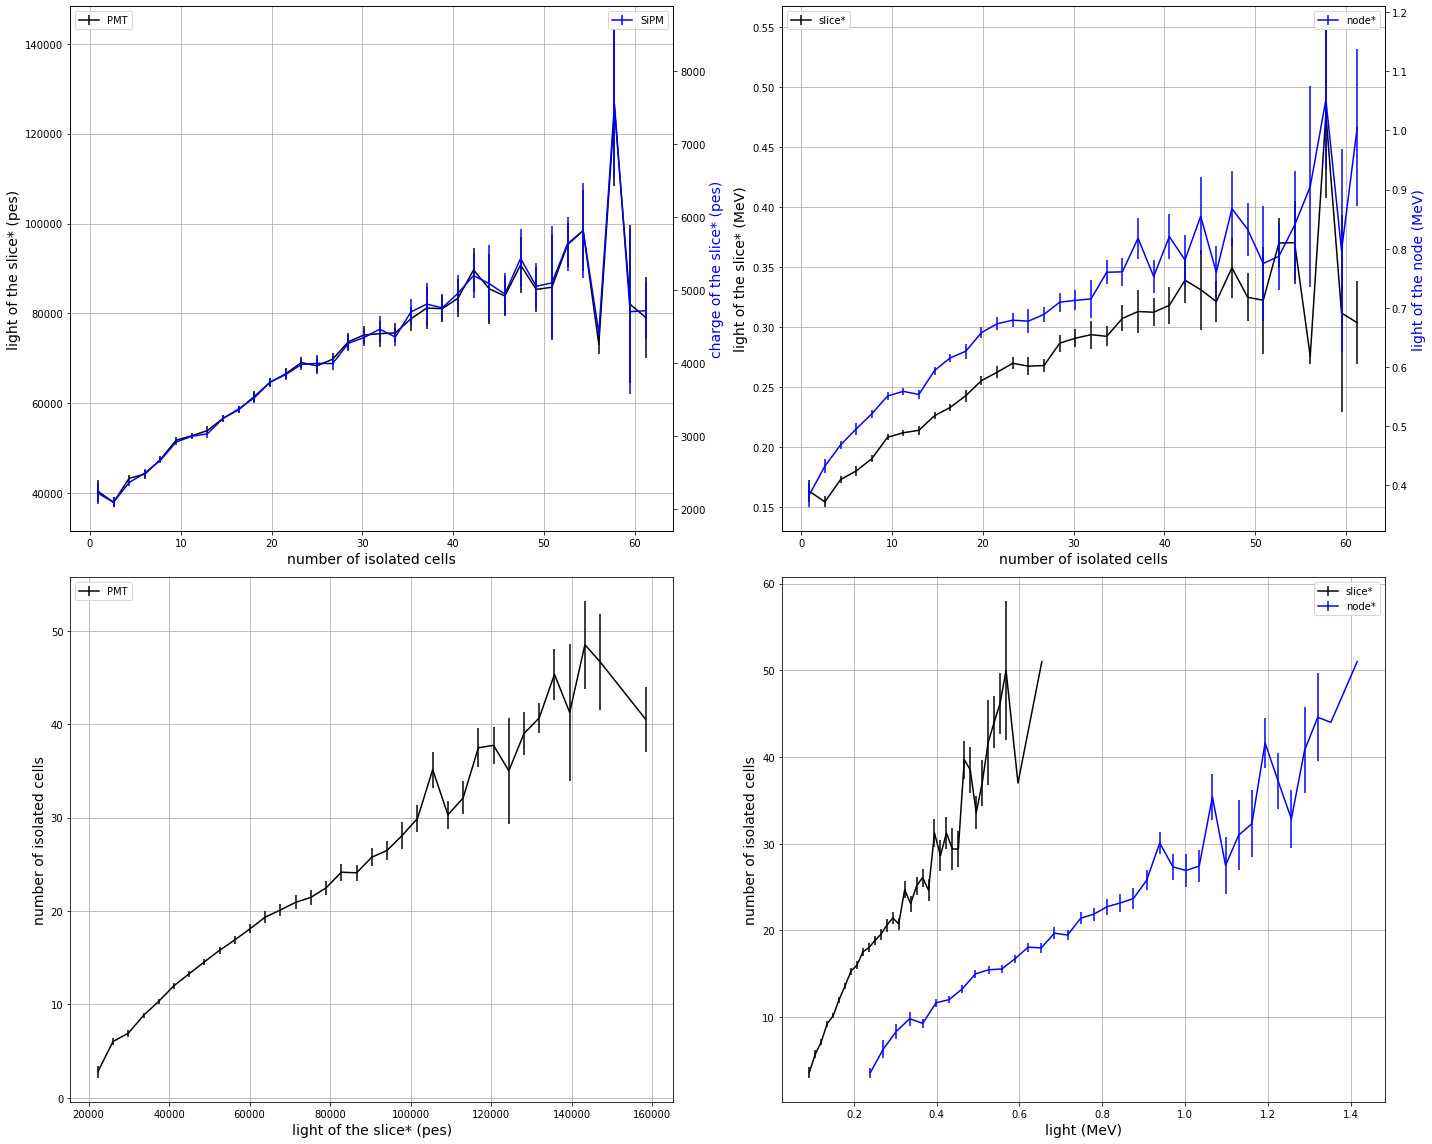

In [141]:
sel = (dz < 120.) & (esum >= 1.55) & (esum < 1.75)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
#pltext.hist(dz[sel], 100);
pltext.hprofile(nisos[sel], e0[sel], nbins, label = 'PMT');
plt.legend(loc = 2); plt.ylabel('light of the slice* (pes)', fontsize = 14); plt.grid()
plt.xlabel('number of isolated cells', fontsize = 14)
plt.gca().twinx(); 
pltext.hprofile(nisos[sel], q0[sel], nbins, label = 'SiPM', c = 'blue');
plt.legend(loc = 0); plt.ylabel('charge of the slice* (pes)', c ='blue', fontsize = 14)



subplot(2)
pltext.hprofile(nisos[sel], er[sel], nbins, label = 'slice*');
plt.legend(loc = 2); plt.ylabel('light of the slice* (MeV)', fontsize = 14); plt.grid()
plt.xlabel('number of isolated cells', fontsize = 14)
plt.gca().twinx()
pltext.hprofile(nisos[sel], enode[sel], nbins, label = 'node*', c = 'blue');
plt.legend(loc = 0); plt.ylabel('light of the node (MeV)', c ='blue', fontsize = 14)
plt.tight_layout();



subplot(3)
#pltext.hist(dz[sel], 100);
pltext.hprofile(e0[sel], nisos[sel], nbins, label = 'PMT');
plt.legend(loc = 2); plt.xlabel('light of the slice* (pes)', fontsize = 14); plt.grid()
plt.ylabel('number of isolated cells', fontsize = 14)


subplot(4)
pltext.hprofile(er[sel], nisos[sel], nbins, label = 'slice*');
plt.xlabel('light (MeV)', fontsize = 14); plt.grid()
plt.ylabel('number of isolated cells', fontsize = 14)
pltext.hprofile(enode[sel], nisos[sel],  nbins, label = 'node*', c = 'blue');
plt.legend()

plt.tight_layout();


#subplot(4)
#pltext.hist(dz[sel], 100);
#pltext.hprofile(q0[sel], nisos[sel], 50);


**Conclusions:**

   * 

# Isolated cells 

## Positions

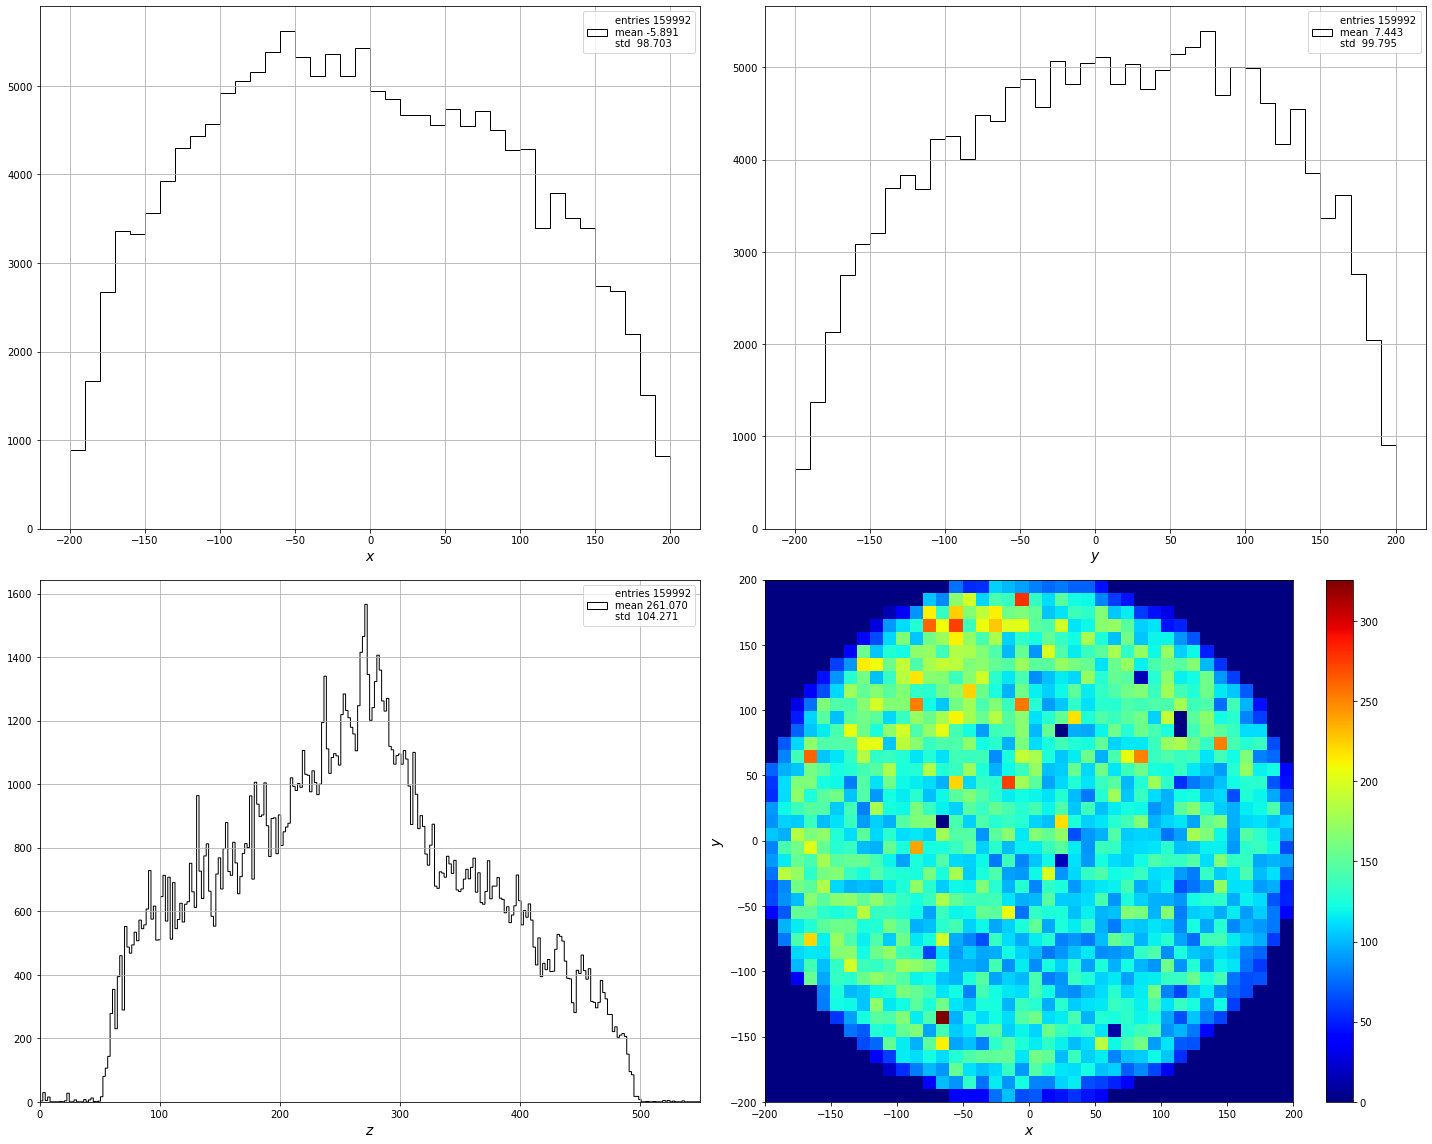

In [142]:
xbins = ut.arstep(dfiso.x, 10., True)
ybins = ut.arstep(dfiso.y, 10., True)
zbins = ut.arstep(dfiso.z,  2., True)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hist(dfiso.x, xbins);
plt.xlabel(r'$x$', fontsize = 14)

subplot(2)
pltext.hist(dfiso.y, ybins);
plt.xlabel(r'$y$', fontsize = 14)

subplot(3)
pltext.hist(dfiso.z, zbins);
plt.xlim((0., 550.))
plt.xlabel(r'$z$', fontsize = 14)

subplot(4)
plt.hist2d(dfiso.x, dfiso.y, (xbins, ybins), cmap = 'jet');
plt.xlabel(r'$x$', fontsize = 14); plt.ylabel(r'$y$', fontsize = 14)
plt.colorbar();
plt.tight_layout();

**Conclusions:**
    
   * There are less isolated cells in the bottom right size of the cambre (x >0, y <0) and slightly more in the top right (x <0 y >0)

## Average light and charge

In [143]:
def hprof(x, bins, weights):
    counts, _ = np.histogram(x, bins)
    values, _ = np.histogram(x, bins, weights = weights)
    sel       = counts > 0.
    print(np.sum(sel))
    values[sel] = values[sel]/(1.*counts[sel])
    centers     = ut.centers(bins) 
    return pltext.hist(centers, bins, weights = values, stats = False)

def h2prof(xs, bins, weights, **kargs):
    counts, _ = np.histogramdd(xs, bins)
    values, _ = np.histogramdd(xs, bins, weights = weights)
    sel       = counts > 0.
    print(np.sum(sel))
    values[sel] = values[sel]/(1.*counts[sel])
    icells       = clouds.to_coors(np.argwhere(sel))
    centers      = [ut.centers(ibin) for ibin in bins]
    ndim         = 2
    cells        = [centers[i][icells[i]] for i in range(ndim)]
    #xcs, ycs    = ut.centers(bins[0]), ut.centers(bins[1])
    #xcms, ycms  = np.meshgrid(xcs, ycs)
    return plt.hist2d(*cells, bins, weights = values[sel], **kargs)

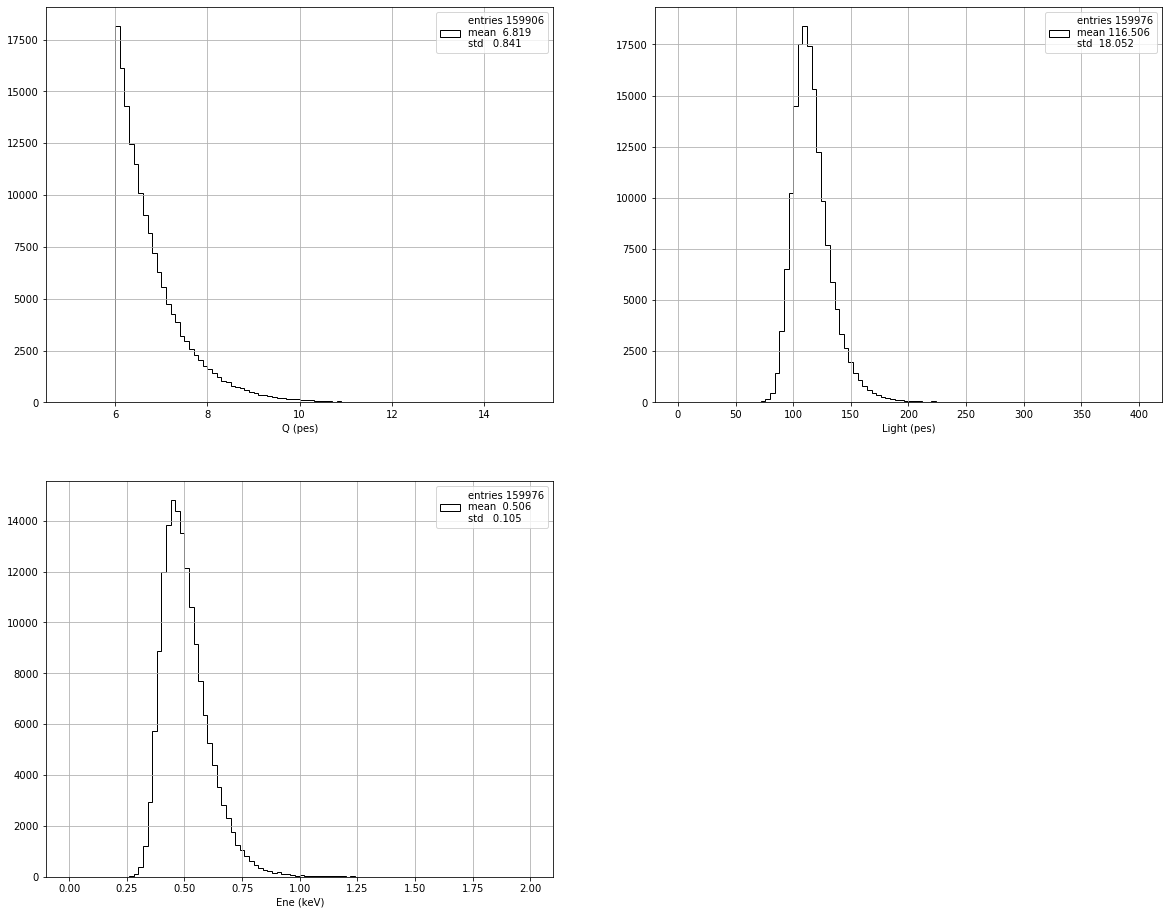

In [160]:

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hist(dfiso.q, 100, range = (5., 15)); 
plt.xlabel('Q (pes)')

subplot(2)
pltext.hist(dfiso.eraw, 100, range = (0., 400)); 
plt.xlabel('Light (pes)')

subplot(3)
pltext.hist(1000. * dfiso.erec, 100, range = (0., 2.)); 
plt.xlabel('Ene (keV)');

**Conclusions**

   * The charge looks like cuting in a tail.
   
   * The light associated and energy seems consistent with 116 pes ad 51 eV signals.

**Some numbers:**

  * The Xe ionization energy in gas is 21.9 eV
  
  
  * The EL yield is $Y = 140 \, (E/p - 0.83) \, p \, \Delta x$, with $E = 7.7$ kV/0.5 cm, $p = 10$ bars and $\Delta x = 0.5$ cm, $Y = 497$ $n_\gamma/n_e$
  
  
  * For Kr we measure approx 13000 pes, that implies $y = 13 \frac{21.9}{41.5} = 6.8$ $pe/n_e$, and a photon detection efficiency of 0.012
  
  
  * That is 116 pes correspond to 17 $n_e$

### Dependence with the position

1291


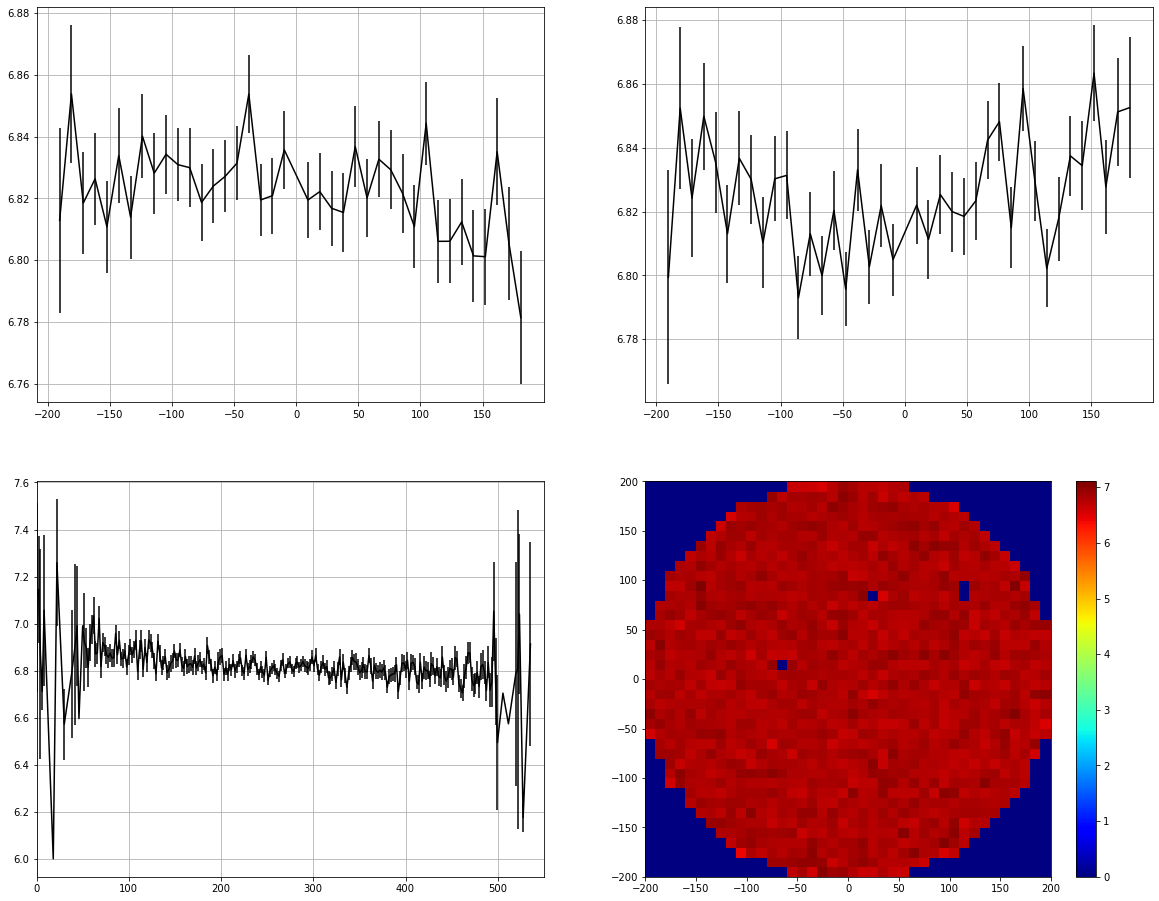

In [146]:
xbins = ut.arstep(dfiso.x, 10., True)
ybins = ut.arstep(dfiso.y, 10., True)
zbins = ut.arstep(dfiso.z,  2., True)

val   = dfiso.q

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x, val, len(xbins)); plt.grid();
#hmean(dfiso.x, xbins, dfiso.q);

subplot(2)
pltext.hprofile(dfiso.y, val, len(ybins)); plt.grid();


subplot(3)
pltext.hprofile(dfiso.z, val, len(zbins)); plt.grid();
plt.xlim((0., 550.));

subplot(4)
h2prof((dfiso.x, dfiso.y), (xbins, ybins),  val, cmap = 'jet');
plt.colorbar();

1291


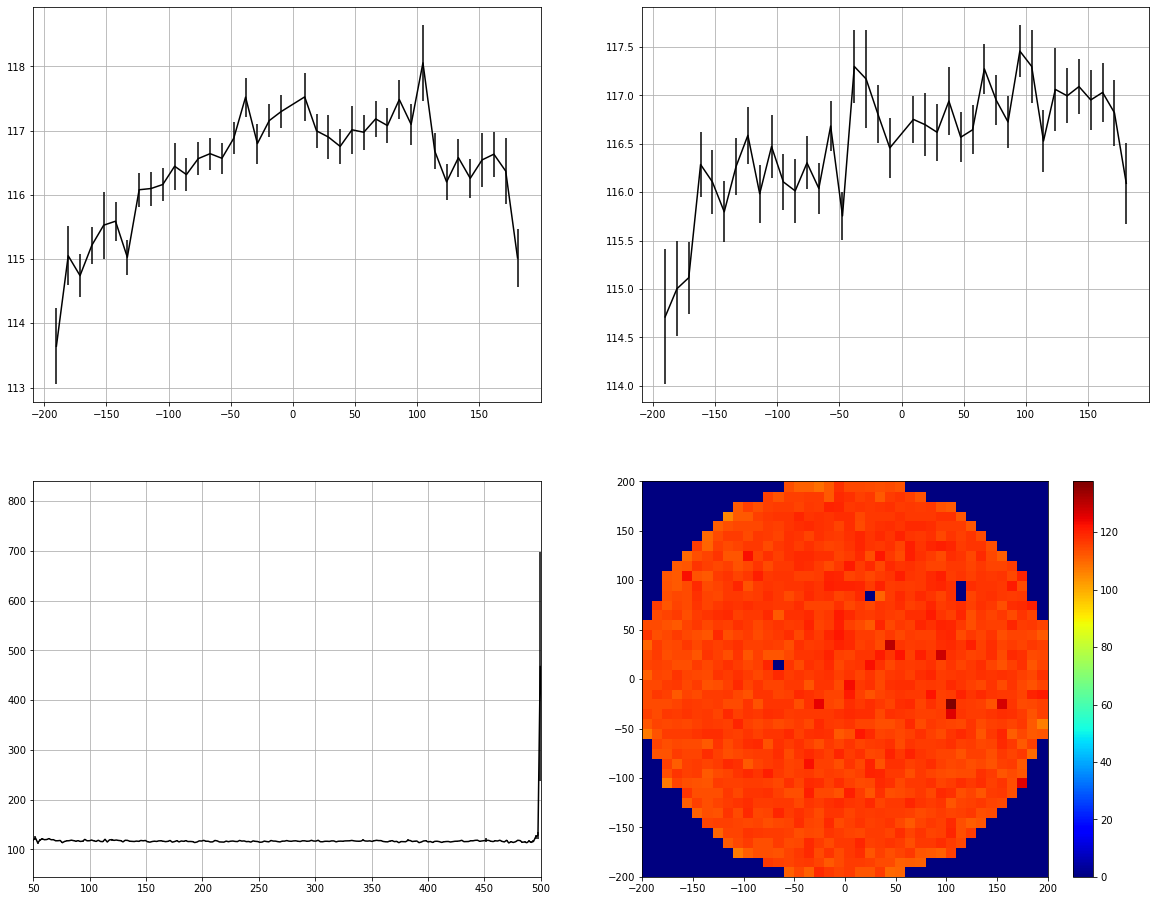

In [147]:
xbins = ut.arstep(dfiso.x, 10., True)
ybins = ut.arstep(dfiso.y, 10., True)
zbins = ut.arstep(dfiso.z,  2., True)

val   = 1000. * dfiso.erec
val   =         dfiso.eraw

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x, val, len(xbins)); plt.grid();
#hmean(dfiso.x, xbins, dfiso.q);

subplot(2)
pltext.hprofile(dfiso.y, val, len(ybins)); plt.grid();


subplot(3)
pltext.hprofile(dfiso.z, val, len(zbins)); plt.grid();
plt.xlim((50., 500.));

subplot(4)
h2prof((dfiso.x, dfiso.y), (xbins, ybins),  val, cmap = 'jet');
plt.colorbar();

1291


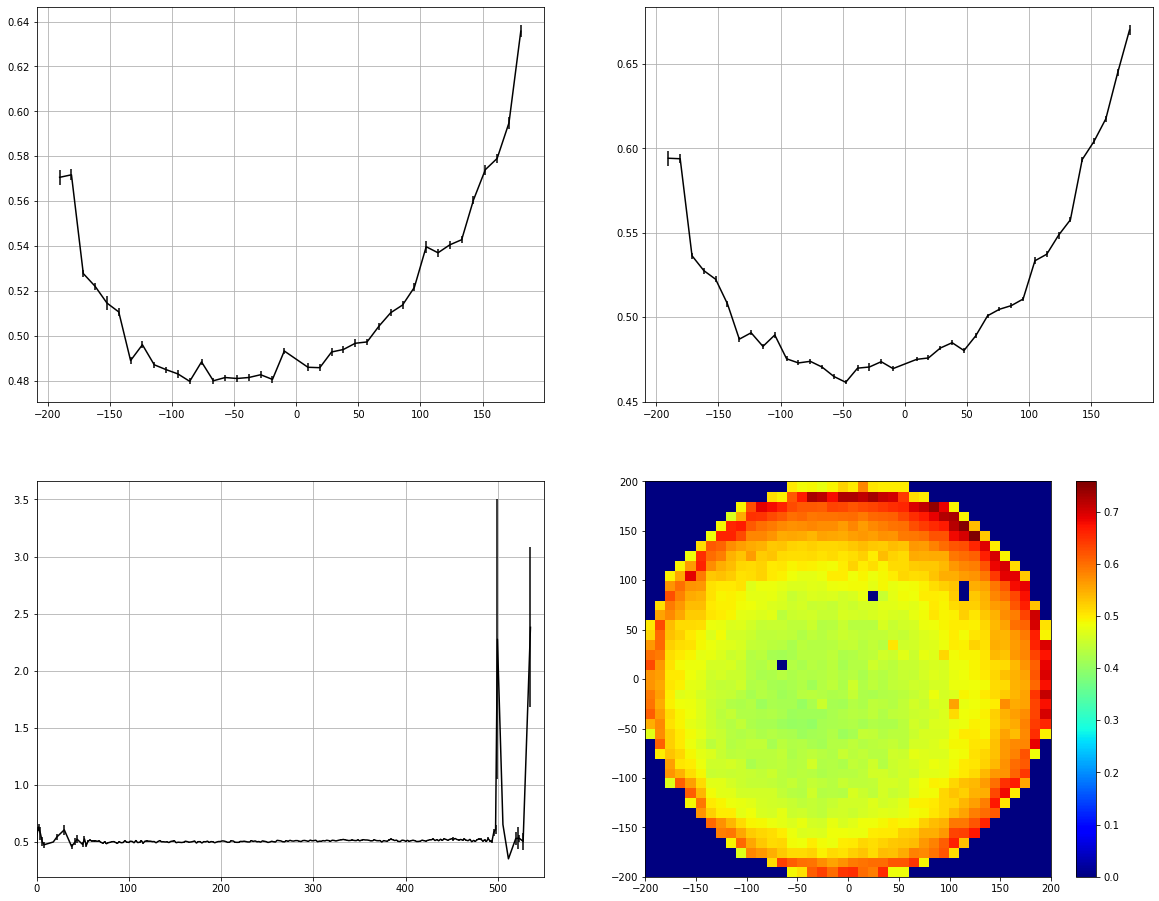

In [148]:
xbins = ut.arstep(dfiso.x, 10., True)
ybins = ut.arstep(dfiso.y, 10., True)
zbins = ut.arstep(dfiso.z,  2., True)

val   = 1000. * dfiso.erec

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x, val, len(xbins)); plt.grid();
#hmean(dfiso.x, xbins, dfiso.q);

subplot(2)
pltext.hprofile(dfiso.y, val, len(ybins)); plt.grid();


subplot(3)
pltext.hprofile(dfiso.z, val, len(zbins)); plt.grid();
plt.xlim((0., 550.));

subplot(4)
h2prof((dfiso.x, dfiso.y), (xbins, ybins),  val, cmap = 'jet');
plt.colorbar();

**Conclusions:**
    
   * The energy associated to them is larger for the outer ring, and on top

   

## Position respect the main node

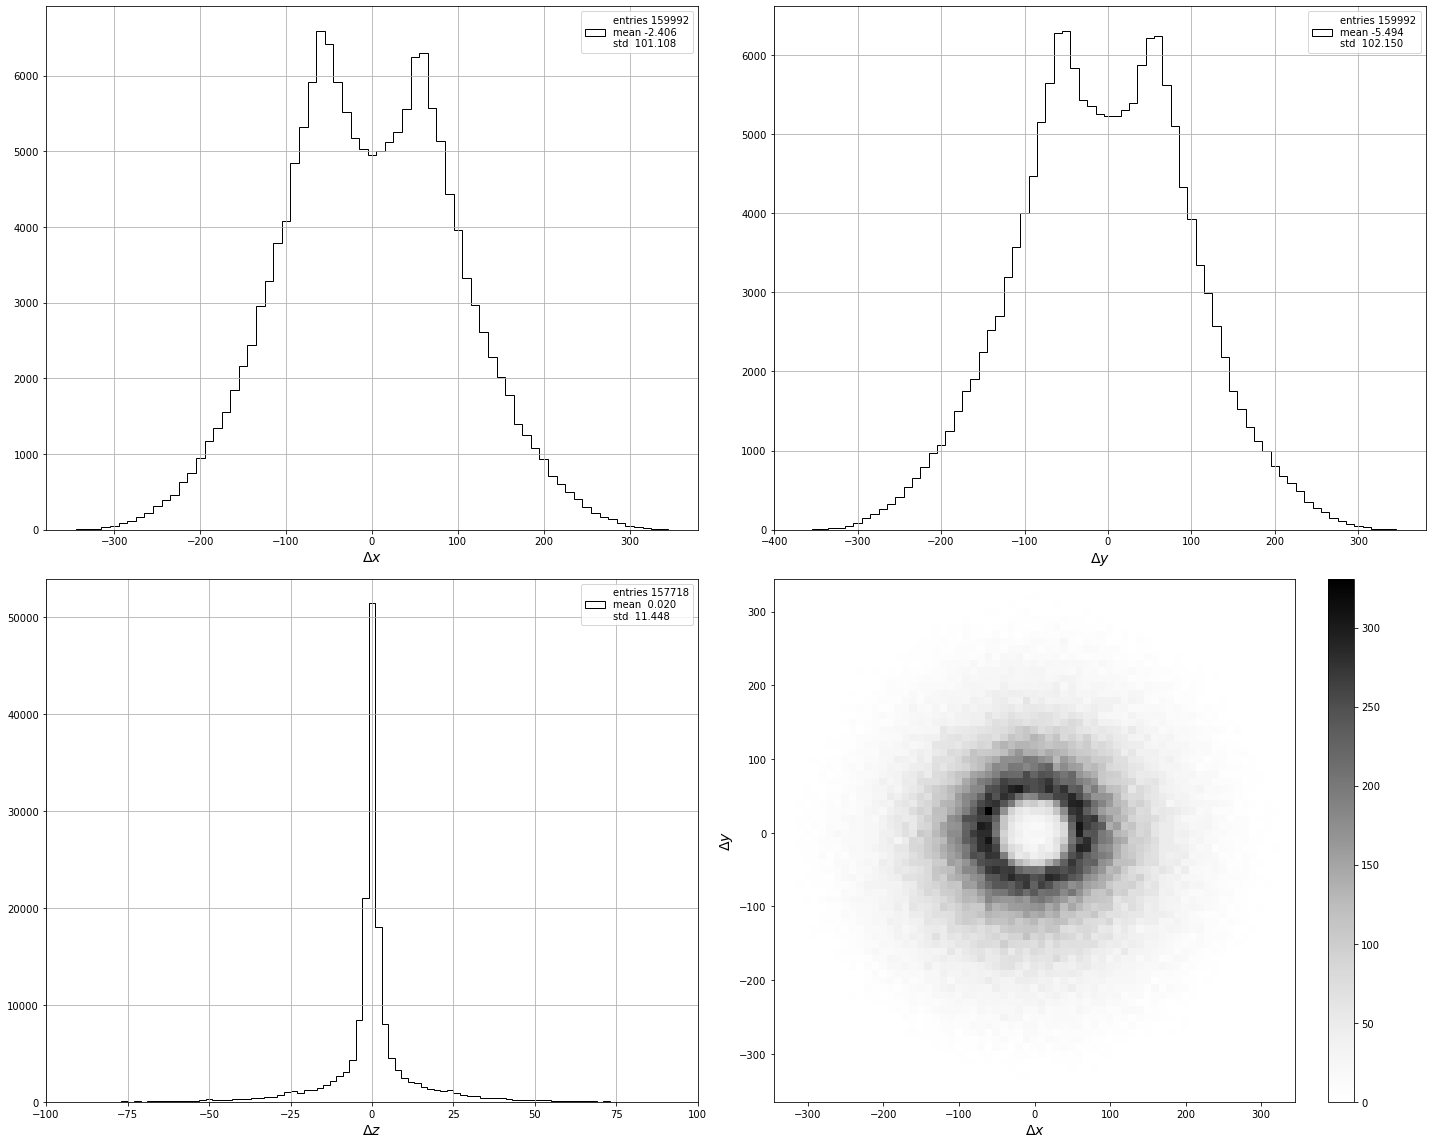

In [149]:
xbins = ut.arstep(dfiso.x - dfiso.xb, 10., True)
ybins = ut.arstep(dfiso.y - dfiso.yb, 10., True)
zbins = ut.arstep(dfiso.z - dfiso.zb,  2., True)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hist(dfiso.x - dfiso.xb, xbins);
plt.xlabel(r'$\Delta x$', fontsize = 14)

subplot(2)
pltext.hist(dfiso.y - dfiso.yb, ybins);
plt.xlabel(r'$\Delta y$', fontsize = 14)

subplot(3)
pltext.hist(dfiso.z - dfiso.zb, zbins, range = (-50., 50.));
plt.xlim((-100., 100));
plt.xlabel(r'$\Delta z$', fontsize = 14)

subplot(4)
plt.hist2d(dfiso.x - dfiso.xb, dfiso.y - dfiso.yb, (xbins, ybins), cmap = 'Greys');
plt.xlabel(r'$\Delta x$', fontsize = 14); plt.ylabel(r'$\Delta y$', fontsize = 14)
plt.colorbar();
plt.tight_layout();

**Conclusions**:
    
   * Most of the isolated cells are centered around the z-position of the most energetic node, and make a crater of 50 mm radious.
   
   
   * Isolated cells are associated with the most energetic node of the event!

## Charge and light respect the main node

3358


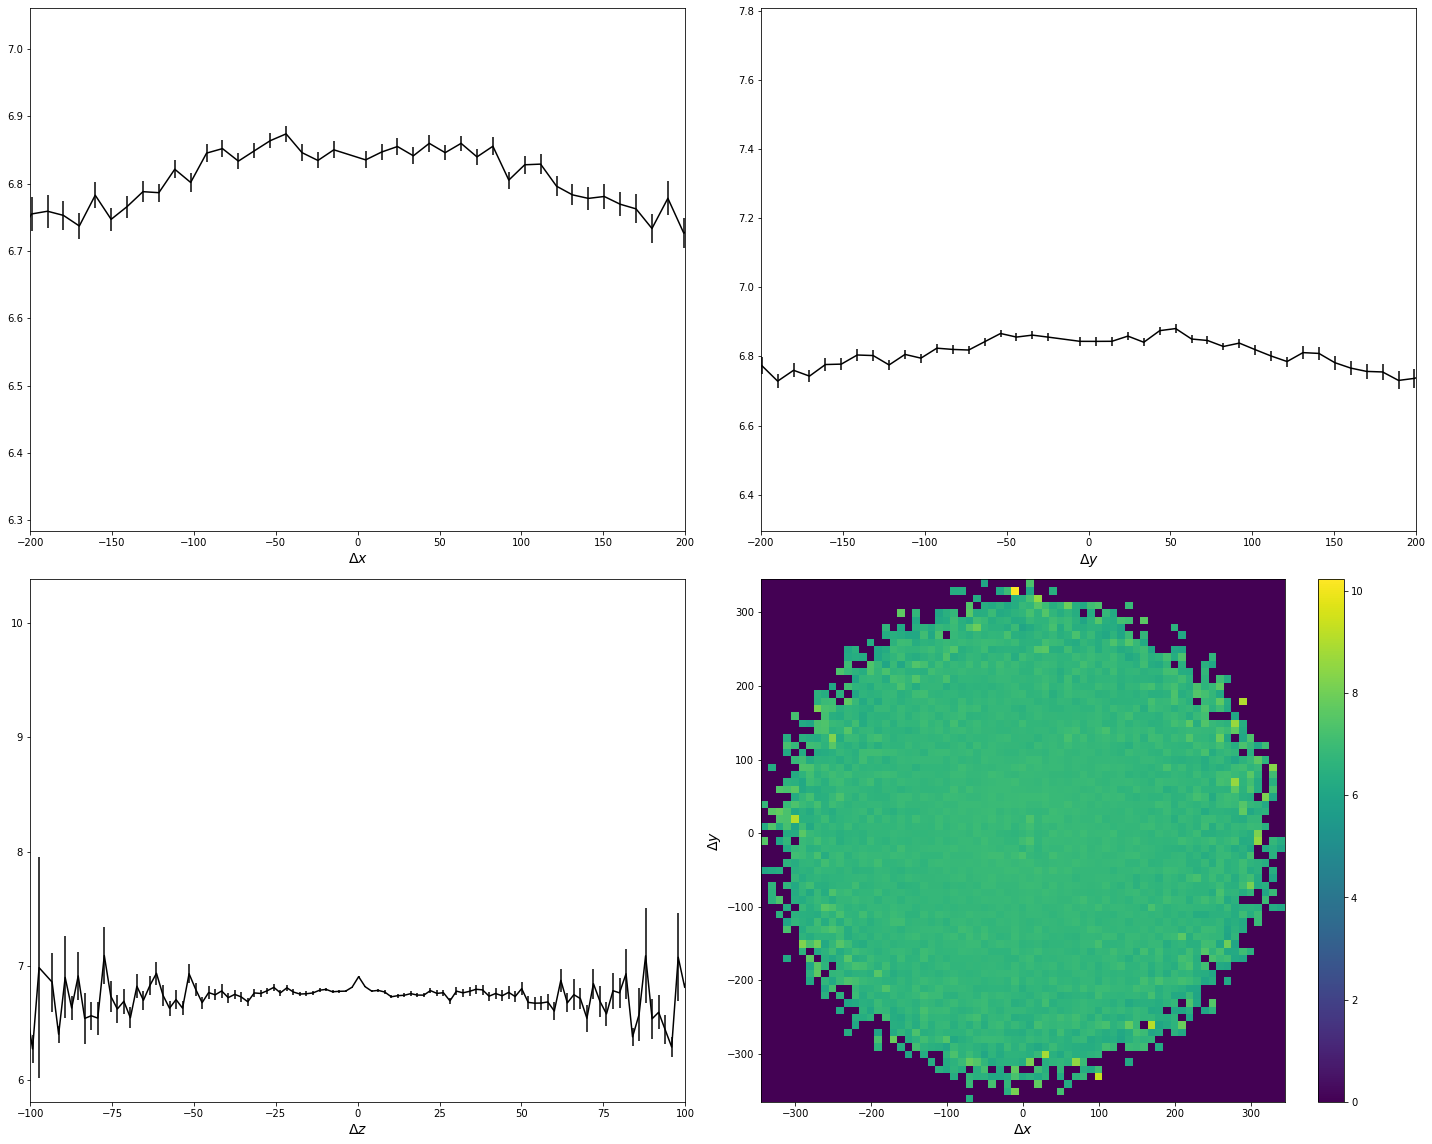

In [150]:
xbins = ut.arstep(dfiso.x - dfiso.xb, 10., True)
ybins = ut.arstep(dfiso.y - dfiso.yb, 10., True)
zbins = ut.arstep(dfiso.z - dfiso.zb,  2., True)

val   = dfiso.q

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x - dfiso.xb, val, len(xbins));
plt.xlabel(r'$\Delta x$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(2)
pltext.hprofile(dfiso.y - dfiso.yb, val, len(ybins));
plt.xlabel(r'$\Delta y$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(3)
pltext.hprofile(dfiso.z - dfiso.zb, val, len(zbins));
plt.xlabel(r'$\Delta z$', fontsize = 14)
plt.xlim((-100., 100.))

subplot(4)
h2prof((dfiso.x - dfiso.xb, dfiso.y - dfiso.yb), (xbins, ybins), val);
plt.xlabel(r'$\Delta x$', fontsize = 14); plt.ylabel(r'$\Delta y$', fontsize = 14)
plt.colorbar();
plt.tight_layout();

3358


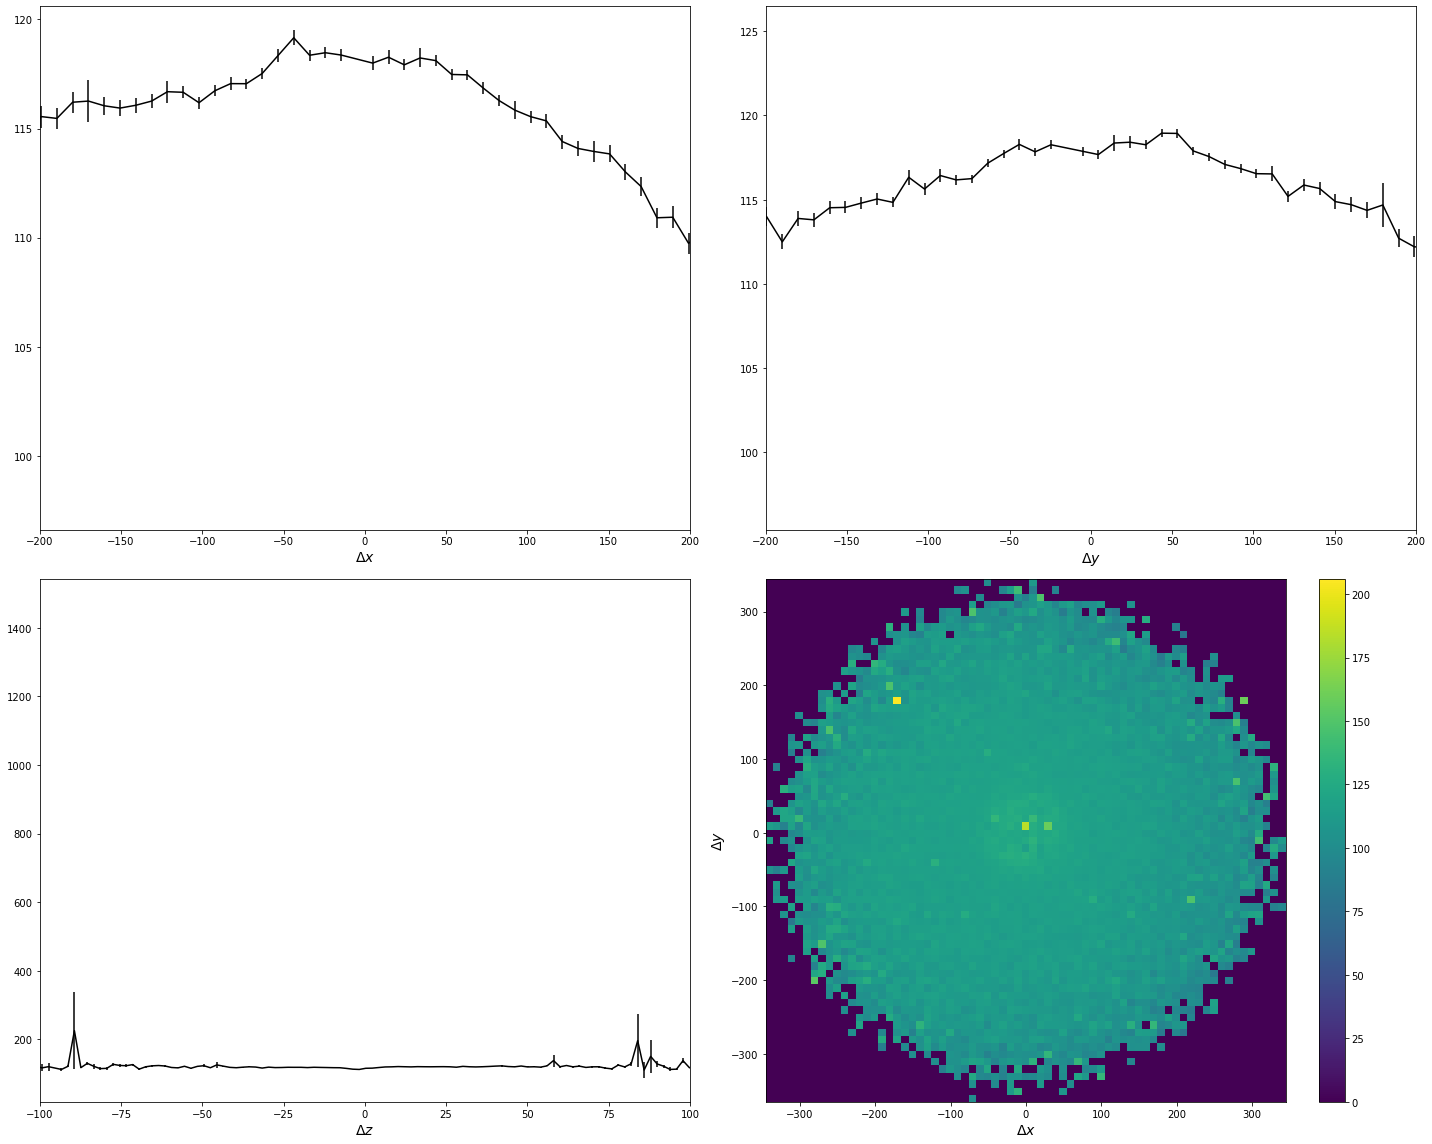

In [151]:
xbins = ut.arstep(dfiso.x - dfiso.xb, 10., True)
ybins = ut.arstep(dfiso.y - dfiso.yb, 10., True)
zbins = ut.arstep(dfiso.z - dfiso.zb,  2., True)

val   = dfiso.eraw

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x - dfiso.xb, val, len(xbins));
plt.xlabel(r'$\Delta x$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(2)
pltext.hprofile(dfiso.y - dfiso.yb, val, len(ybins));
plt.xlabel(r'$\Delta y$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(3)
pltext.hprofile(dfiso.z - dfiso.zb, val, len(zbins));
plt.xlabel(r'$\Delta z$', fontsize = 14)
plt.xlim((-100., 100.))

subplot(4)
h2prof((dfiso.x - dfiso.xb, dfiso.y - dfiso.yb), (xbins, ybins), val);
plt.xlabel(r'$\Delta x$', fontsize = 14); plt.ylabel(r'$\Delta y$', fontsize = 14)
plt.colorbar();
plt.tight_layout();

3358


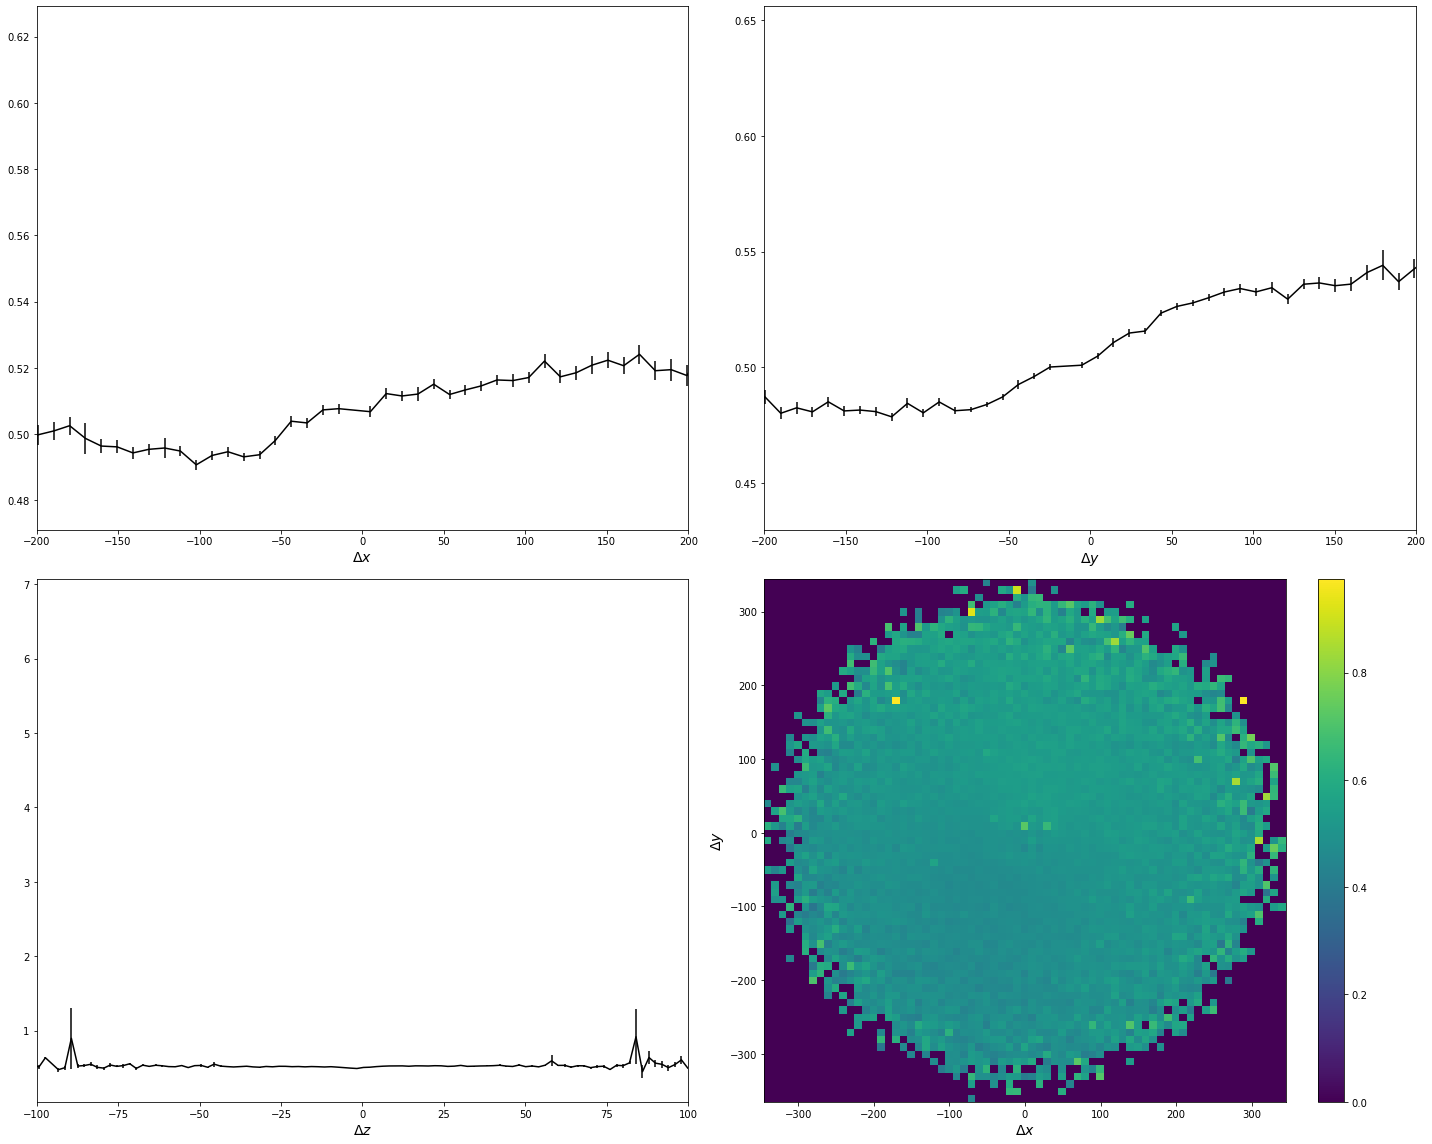

In [152]:
xbins = ut.arstep(dfiso.x - dfiso.xb, 10., True)
ybins = ut.arstep(dfiso.y - dfiso.yb, 10., True)
zbins = ut.arstep(dfiso.z - dfiso.zb,  2., True)

val   = 1000. * dfiso.erec

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x - dfiso.xb, val, len(xbins));
plt.xlabel(r'$\Delta x$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(2)
pltext.hprofile(dfiso.y - dfiso.yb, val, len(ybins));
plt.xlabel(r'$\Delta y$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(3)
pltext.hprofile(dfiso.z - dfiso.zb, val, len(zbins));
plt.xlabel(r'$\Delta z$', fontsize = 14)
plt.xlim((-100., 100.))

subplot(4)
h2prof((dfiso.x - dfiso.xb, dfiso.y - dfiso.yb), (xbins, ybins), val);
plt.xlabel(r'$\Delta x$', fontsize = 14); plt.ylabel(r'$\Delta y$', fontsize = 14)
plt.colorbar();
plt.tight_layout();

## Extend energy of the most energetic node

### Compare HT and LT

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75)


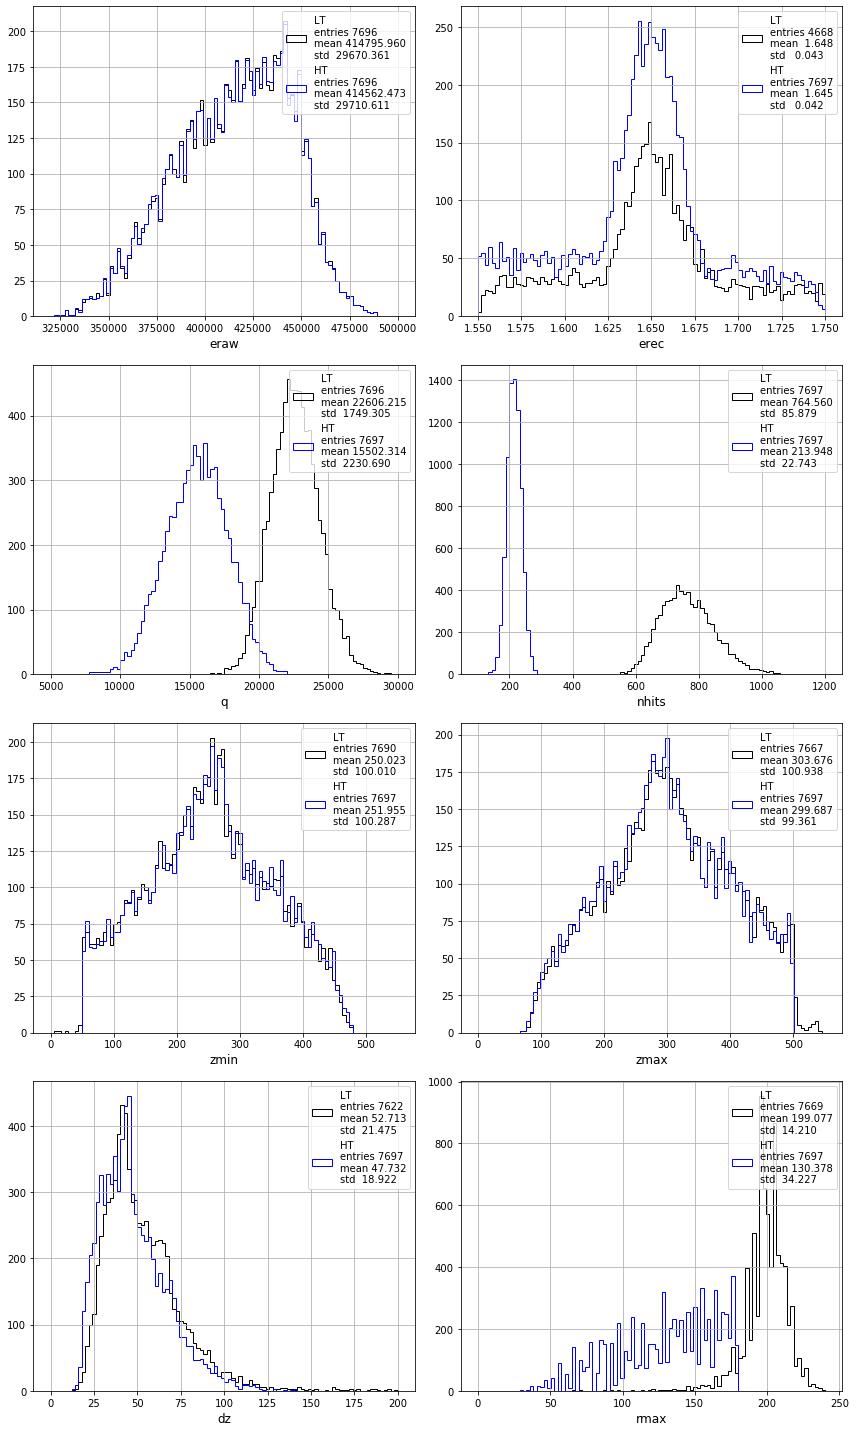

In [93]:
sel = selections['fidutial.HT']
print(sel.info)

bins     = 100
names    = ['eraw', 'erec', 'q', 'nhits', 'zmin', 'zmax', 'dz', 'rmax']
xranges  = {'eraw' : (32e4, 50e4),
            'erec' : (1.55, 1.75),
            'q'    : ( 5e3, 30e3),
            'nhits': ( 100, 1200),
            'zmin' : (  0., 550.),
            'zmax' : (  0., 550.),
            'dz'   : (  0., 200.),
            'rmax' : (  0., 240.)
           }

subplot = pltext.canvas(len(names), 2)

for i, name in enumerate(names):
    subplot(i + 1)
    pltext.hist(df[name]       [sel], bins, range = xranges[name], label = 'LT');
    pltext.hist(df[name + 'HT'][sel], bins, range = xranges[name], label = 'HT');
    plt.xlabel(name, fontsize = 12)
    plt.legend();
plt.tight_layout();


**Conclusions:**

   * For LT hits the maximum radious is quite large, at 200 mm in average!! No HT hits are above 180 (due to selections)
   
   
   * Due to LT hits out of the Kr-map, the events in Erec has decreased 4668/7697, acceptance 60.4%
   
   
   * Charge decreased by a factor 0.58, and the number of hits by 0.2, from 764 to 213 hits!
   
   
   * Also $\Delta z$ decreases in average from 52.7 mm to 47.8 mm
   


### E-resolution HT for in/out of Kr-map LT hits

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75) & evt_outcells [0.0, 0.5)


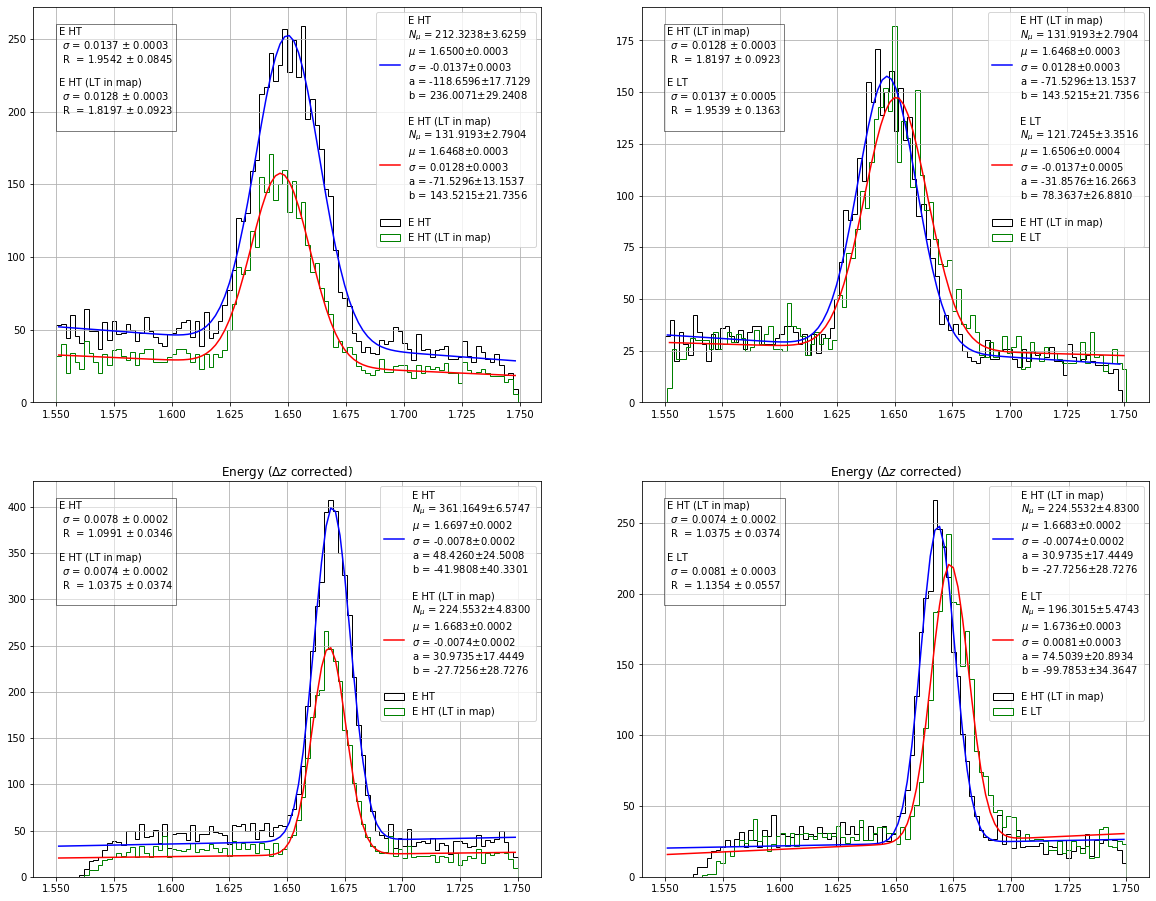

In [95]:
selHT = selections['fidutial.HT']
sel   = selections['fidutial.LT']
print(sel.info)

bins      = 100
formate   = '6.4f'

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
ss1, _, _ = pltbes.pfit_energy(df.erecHT[selHT], bins, formate = formate, label = 'E HT');
ss2, _, _ = pltbes.pfit_energy(df.erecHT[sel]  , bins, formate = formate, label = 'E HT (LT in map)')
pltext.plt_text(ss1 + '\n' + ss2)

subplot(2)
ss1, _, _ = pltbes.pfit_energy(df.erecHT[sel], bins, formate = formate, label = 'E HT (LT in map)');
ss2, _, _ = pltbes.pfit_energy(df.erec  [sel], bins, formate = formate, label = 'E LT');
pltext.plt_text(ss1 + '\n' + ss2)

df['erecC']   = bes.energy_correction(df.erec.values  , df.dz.values)
df['erecHTC'] = bes.energy_correction(df.erecHT.values, df.dzHT.values)


subplot(3)
ss1, _, _ = pltbes.pfit_energy(df.erecHTC[selHT], bins,
                               range = ranges['erecHT'], formate = formate, label = 'E HT');
ss2, _, _ = pltbes.pfit_energy(df.erecHTC[sel]  , bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E HT (LT in map)')
plt.title(r'Energy ($\Delta z$ corrected)')
pltext.plt_text(ss1 + '\n' + ss2)

subplot(4)
ss1, _, _ = pltbes.pfit_energy(df.erecHTC[sel], bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E HT (LT in map)');
ss2, _, _ = pltbes.pfit_energy(df.erecC  [sel], bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E LT');
plt.title(r'Energy ($\Delta z$ corrected)')
pltext.plt_text(ss1 + '\n' + ss2)



**Conclusions:**

   * Energy resolution is slightly better with HT (LT in Kr map) but compatible with LT hits.
   

### Energy in track

overwriting  fidutial.LT.trk_ecells  selection
zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75) & evt_outcells [0.0, 0.5) & trk_ecells [1.55, 1.75)


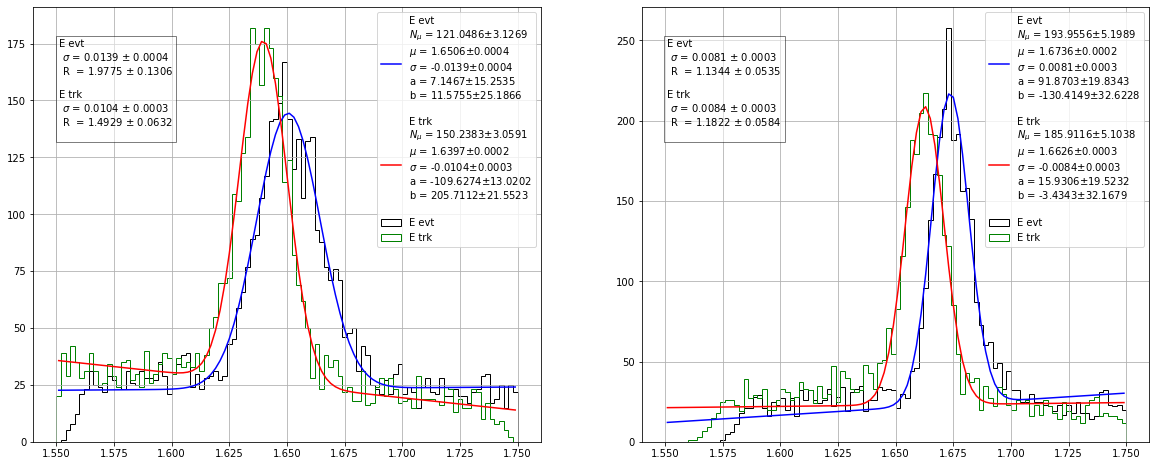

In [99]:
sel   = selections.logical_and(('fidutial.LT', 'trk_ecells'), 'fidutial.LT.trk_ecells')
print(sel.info)

bins      = 100
formate   = '6.4f'

subplot = pltext.canvas(2, 2, 8, 10)

subplot(1)
ss1, _, _ = pltbes.pfit_energy(df.evt_ecells[sel], bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E evt');
ss2, _, _ = pltbes.pfit_energy(df.trk_ecells[sel], bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E trk')
pltext.plt_text(ss1 + '\n' + ss2)

subplot(2)
df['evt_ecellsC'] = bes.energy_correction(df.evt_ecells.values, df.evt_dz.values)
df['trk_ecellsC'] = bes.energy_correction(df.trk_ecells.values, df.trk_dz.values)

ss1, _, _ = pltbes.pfit_energy(df.evt_ecellsC[sel], bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E evt');
ss2, _, _ = pltbes.pfit_energy(df.trk_ecellsC[sel], bins,
                               range = ranges['erecHT'], formate = formate, label = 'E trk');
pltext.plt_text(ss1 + '\n' + ss2)


#subplot(3)
#ss1, _, _ = pltbes.pfit_energy(df.erecHTC[selHT], bins,
#                               range = ranges['erecHT'], formate = formate, label = 'E HT');
#ss2, _, _ = pltbes.pfit_energy(df.erecHTC[sel]  , bins, 
#                               range = ranges['erecHT'], formate = formate, label = 'E HT (LT in map)')
#plt.title(r'Energy ($\Delta z$ corrected)')
#pltext.plt_text(ss1 + '\n' + ss2)

#subplot(4)
#ss1, _, _ = pltbes.pfit_energy(df.erecHTC[sel], bins, 
#                               range = ranges['erecHT'], formate = formate, label = 'E HT (LT in map)');
#ss2, _, _ = pltbes.pfit_energy(df.erecC  [sel], bins, 
#                               range = ranges['erecHT'], formate = formate, label = 'E LT');
#plt.title(r'Energy ($\Delta z$ corrected)')
#pltext.plt_text(ss1 + '\n' + ss2)


#subplot(3)
#ss1, _, _ = pltbes.pfit_energy(df.trk_ecells[sel], bins, formate = None, label = 'E-track-cells');
#ss2, _, _ = pltbes.pfit_energy(df.trk_enodes[sel], bins, formate = None, label = 'E-track-nodes')
#ss3, _, _ = pltbes.pfit_energy(df.trk_enodes[sel], bins, formate = None, label = 'E-track-rangs')
#pltext.plt_text(ss1 + ss2 + ss3)

#subplot(4)
#ss1, _, _ = pltbes.pfit_energy(df.evt_ecells[sel], bins, formate = None, label = 'E-evt-cells');
#ss2, _, _ = pltbes.pfit_energy(df.trk_ecells[sel], bins, formate = None, label = 'E-track-cells')
#pltext.plt_text(ss1 + ss2)

### Dz - effect

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75) & evt_outcells [0.0, 0.5) & trk_ecells [1.55, 1.75)


(0.0, 120.0)

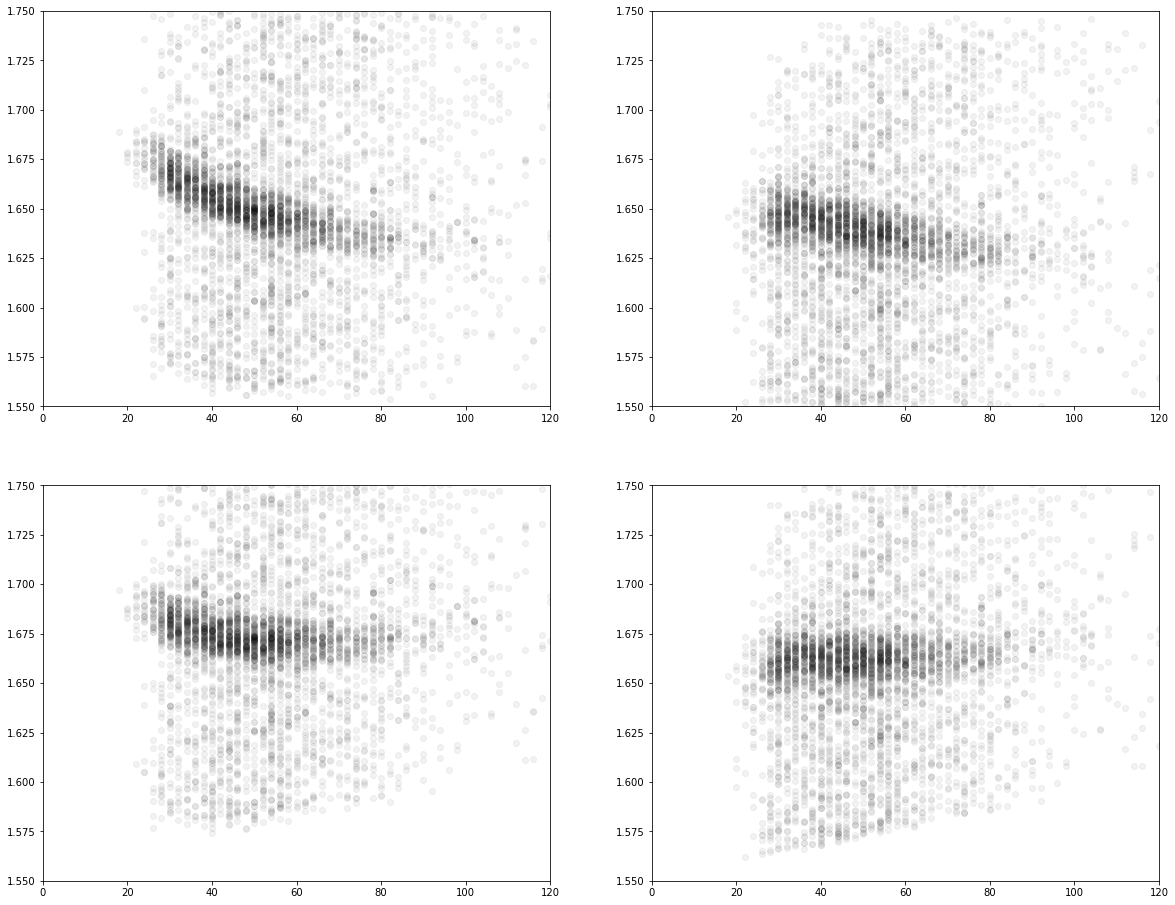

In [107]:
sel = selections['fidutial.LT.trk_ecells']
print(sel.info)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
plt.scatter(df.evt_dz[sel], df.evt_ecells[sel], alpha = 0.05);
plt.ylim(ranges['trk_ecells']); plt.xlim((0., 120.))

subplot(2)
plt.scatter(df.trk_dz[sel], df.trk_ecells[sel], alpha = 0.05);
plt.ylim(ranges['trk_ecells']); plt.xlim((0., 120.))

subplot(3)
plt.scatter(df.evt_dz[sel], df.evt_ecellsC[sel], alpha = 0.05);
plt.ylim(ranges['trk_ecells']); plt.xlim((0., 120.))

subplot(4)
plt.scatter(df.trk_dz[sel], df.trk_ecellsC[sel], alpha = 0.05);
plt.ylim(ranges['trk_ecells']); plt.xlim((0., 120.))




**Conclusions:**

  * $\Delta z$ effect more pronounced for events than for track
  
  * The correction works better for the main track, but there is more dispersion than for the event!
  
  

### Isolated clouds

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75) & evt_outcells [0.0, 0.5) & trk_ecells [1.55, 1.75)


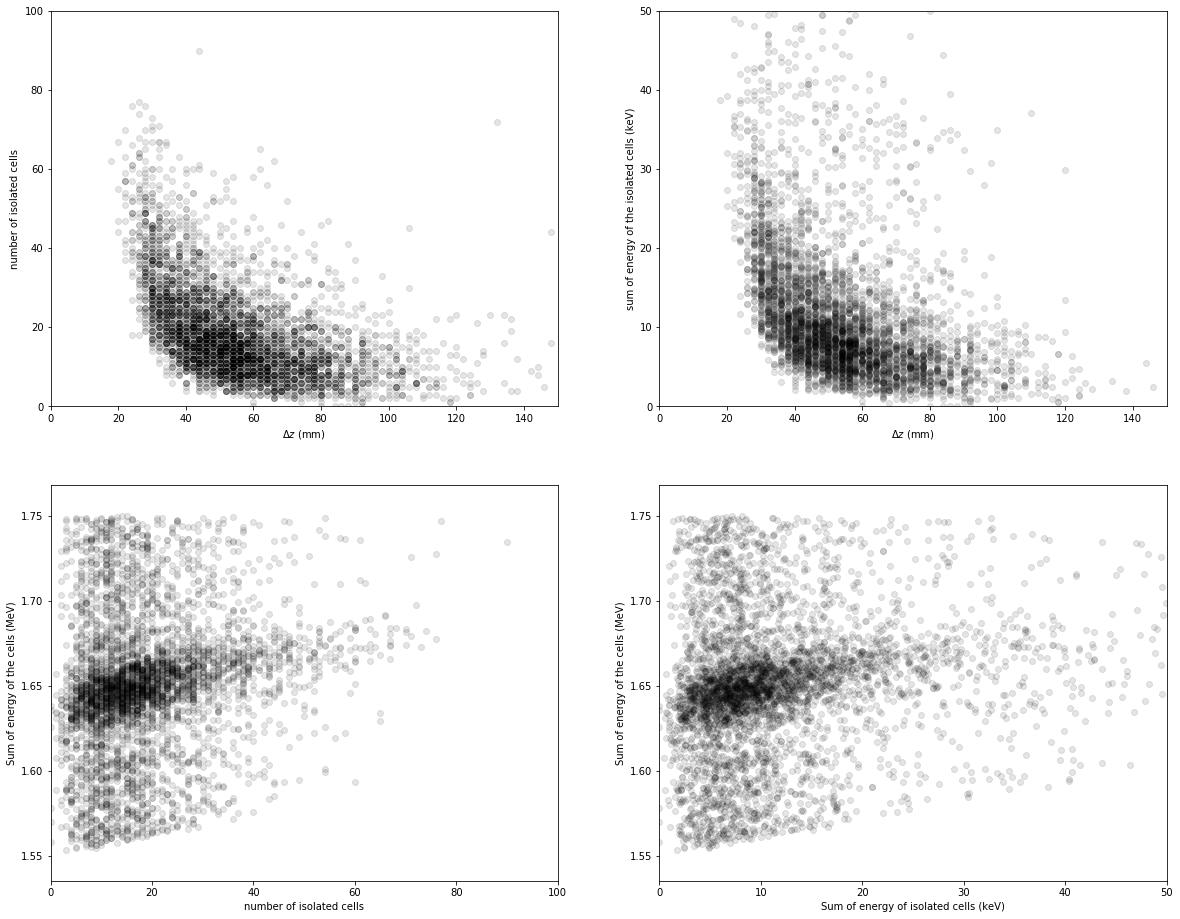

In [116]:
ranges['trk_dz.ds'] = (0., 150.)

sel     = selections['fidutial.LT.trk_ecells']

print(sel.info)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
plt.scatter(df.evt_dz[sel], df.evt_nisos[sel], alpha = 0.1);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('number of isolated cells');
plt.xlim(ranges['trk_dz.ds']); plt.ylim((0., 100.));

subplot(2)
plt.scatter(df.trk_dz[sel], 1000. * df.evt_eisos[sel], alpha = 0.1);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('sum of energy of the isolated cells (keV)');
plt.xlim(ranges['trk_dz.ds']); plt.ylim((0., 50.));

subplot(3)
plt.scatter(df.evt_nisos[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylabel('Sum of energy of the cells (MeV)'); plt.xlabel('number of isolated cells');
plt.xlim(ranges['trk_ecells']); plt.xlim((0., 100.));

subplot(4)
plt.scatter(1000. * df.evt_eisos[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylabel('Sum of energy of the cells (MeV)'); plt.xlabel('Sum of energy of isolated cells (keV)');
plt.xlim(ranges['trk_ecells']); plt.xlim((0., 50.));

**Conclusions:**
    
   * Number of isolated cells is correlated with $\Delta z$, more isolated cells with smaller $\Delta z$


   * Sum of the energy of the events correlated with $\Delta z$, more energy with more isolated cells


   * if Isolated cells are removed and the total light associated to main track (HT-hits) then, shorter tracks have more light, more 'energy'.